#  (Ford go Bike Data Exploration)
## by (Ahmed Saeed)

## Preliminary Wrangling

> The dataset used for this exploratory analysis consists of month individual trip data for February 2019 in CSV format covering the greater San Francisco Bay area, raw data is available here https://www.fordgobike.com/system-data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.shape

(183412, 16)

### What is the structure of your dataset?

> There are 183412 bike trip in the dataset with 16 features  
Most variables are numeric , but the variables start_station_name , end_station_name , user_type are Strings
also start_time , end_time are considering as object

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out which station has the hightest demand and which days of the week see the most demand  
Analysis of the Biking durations across days of week and hours

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe features like duration_sec,start_station_id and end_station_id will help my investigation

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
# change the data_type for start_time and end_time to be datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [8]:
# check duplicates
df.duplicated().sum()

0

In [9]:
# check about null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# Drop rows that does not have station id
df_clean = df.copy()
df_clean.dropna(inplace=True)
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# i'll drop columns that wouldn't help me 
df_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip',], axis=1, inplace=True)

In [12]:
# Add a feature duration min to make it easy to deal with bike trips time
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,29.883333


## investigate Trips Duration Distribution

In [13]:
# function to plot histogram distribution for one feature
def plot_hist(df,col,colname,binsize,xlabel,xlim):
    bins = np.arange(0, col.max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = colname, bins = bins)
    plt.xlim(xlim)
    plt.xlabel(xlabel)

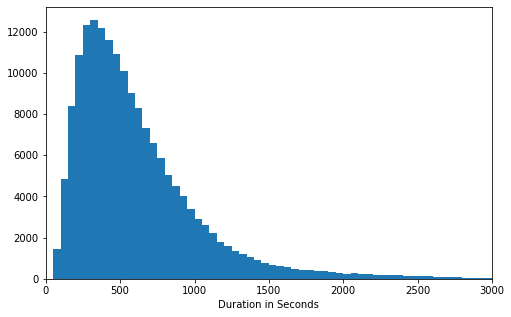

In [14]:
col = df_clean['duration_sec']
colname = 'duration_sec'
binsize = 50
xlim=(0, 3000)
plot_hist(df_clean,col,colname,binsize,'Duration in Seconds',xlim)

In [15]:
df_clean['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

### The data is not normally distributed . so i'll calculate (IQR)
> • IQR = Q3 - Q1 = 13.266 - 5.416 = 7.85  
• Upper Wisker Bound = (1.5 * IQR) + Q3 = 11.775 + 13.266 = 25.041

In [16]:
# function to plot log scale for one feature
def plot_log(df,col,colname,xlabel):
    log_binsize = 0.025
    bins = 10 ** np.arange(0, np.log10(col.max())+log_binsize, log_binsize)

    plt.figure(figsize=[8, 5]);
    plt.hist(data = df, x = colname, bins = bins);
    plt.xscale('log');
    plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
    plt.xlabel(xlabel);

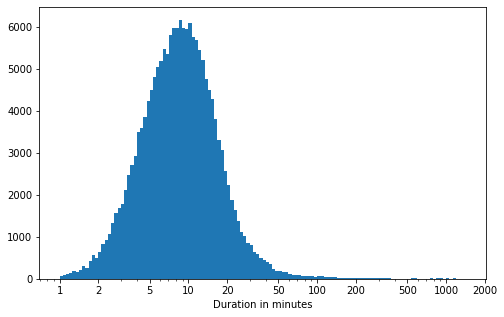

In [17]:
col = df_clean['duration_min']
colname = 'duration_min'
plot_log(df_clean,col,colname,'Duration in minutes')

The distribution now looks closer to normal distribution. But, there is a long tail still. so i'll remove the long tail.

In [18]:
# remove any outliers by selecting duration_min < 100 min
df_clean = df_clean[df_clean['duration_min'] <= 100]

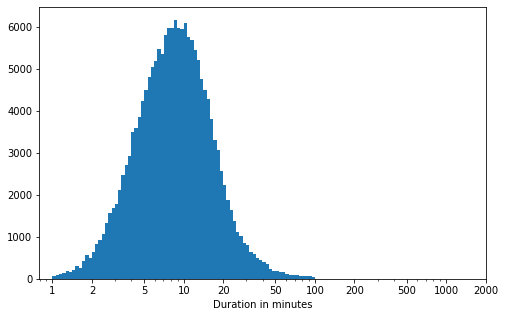

In [19]:
# After removing the long tail.
col = df_clean['duration_min']
colname = 'duration_min'
plot_log(df_clean,col,colname,'Duration in minutes')

> It's seems that most of the trips are about 10 minutes .. most users use bikes for short trips.

### we would now add new features like start date , start hour day , start  day week

In [20]:
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_week'] = df_clean.start_time.dt.strftime('%A')

df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,start_date,start_hour_day,start_day_week
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,26.416667,2019-02-28,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,29.883333,2019-02-28,23,Thursday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,19.116667,2019-02-28,23,Thursday
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,26.916667,2019-02-28,23,Thursday
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,26.166667,2019-02-28,23,Thursday


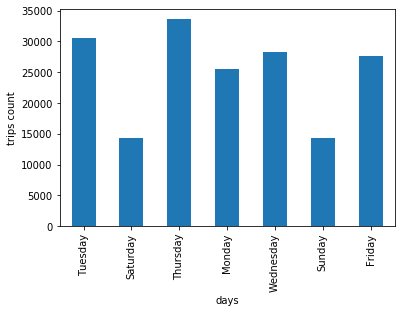

In [21]:
# which days have the most trips
pd.value_counts(df_clean['start_day_week'],sort=False).plot.bar()
plt.xlabel('days')
plt.ylabel('trips count');

> Working days have the most trips especially (Thursday) >> our users maybe use bikes for going to work or school  
Sunday and Saturday are less to have trips 

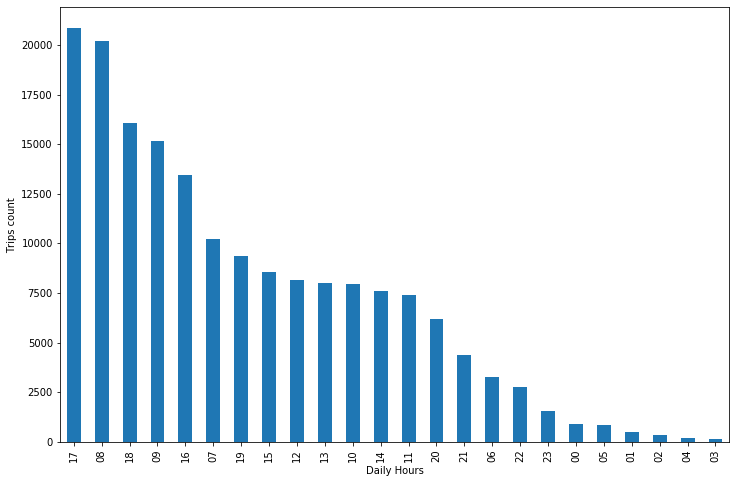

In [22]:
# Rush hours
plt.figure(figsize=[12, 8]);
pd.value_counts(df_clean['start_hour_day']).plot.bar()
plt.xlabel('Daily Hours')
plt.ylabel('Trips count');

> at 17 and 08 there are rush hours when people going and leaving Work

In [23]:
df_clean['Age'] = df_clean.start_time.dt.strftime('%Y').astype(float) - df_clean.member_birth_year
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_min,start_date,start_hour_day,start_day_week,Age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,26.416667,2019-02-28,23,Thursday,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,29.883333,2019-02-28,23,Thursday,60.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,19.116667,2019-02-28,23,Thursday,36.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,26.916667,2019-02-28,23,Thursday,30.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,26.166667,2019-02-28,23,Thursday,31.0


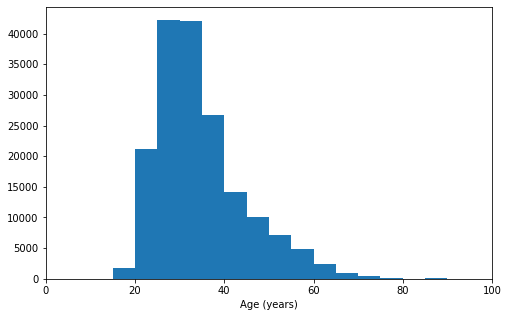

In [24]:
plot_hist(df_clean,df_clean['Age'],'Age',5,'Age (years)',(0, 100))

In [25]:
# remove any outliers by selecting Age < 60 Years
df_clean = df_clean[df_clean['Age'] <= 60]

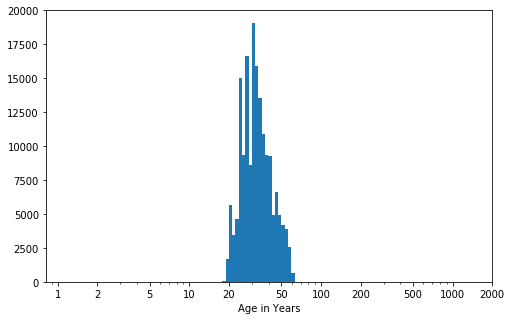

In [26]:
# there's a long tail in the distribution, so let's put it on a log scale instead
col = df_clean['Age']

plot_log(df_clean,col,'Age','Age in Years')

> most of bike users are in age group (30 > 40) years

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes the data have long tail and i removed it

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there were stations didn't have id so i dropped it ,also i removed gps coordinates columns for simplicity  
also added [duration_min	start_date	start_hour_day	start_day_week	start_month	year] to help me in my investigation

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data.

### Total duration in mins of usage of the bike sharing system by Customer and Subscriber

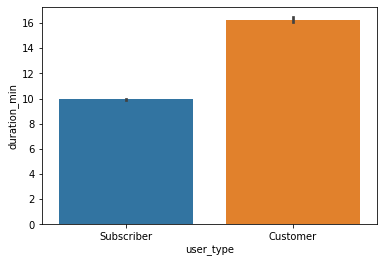

In [27]:
sb.barplot(x='user_type', y='duration_min', data=df_clean);

 >Customer users  have more duration mins more than subscribers

> Trips from 10 to 16 usualy have higher Duration

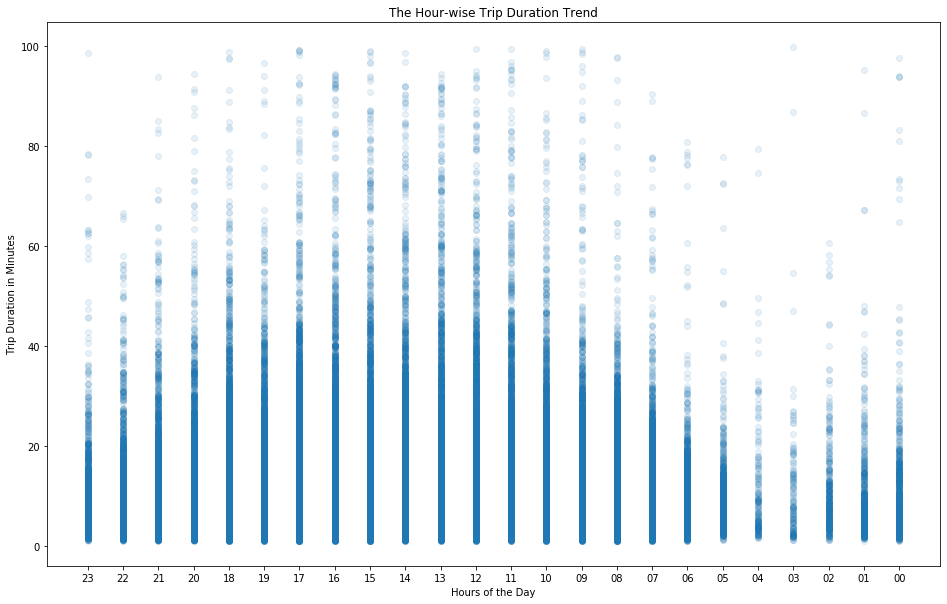

In [28]:
# Here we plot and track the changes in duration over each Hour.

plt.figure(figsize = [16,10]) # Makes the figure enlarged for better visualization 
plt.scatter(data = df_clean , x = 'start_hour_day' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Hour-wise Trip Duration Trend')
plt.xlabel('Hours of the Day')
plt.ylabel('Trip Duration in Minutes')
plt.show();

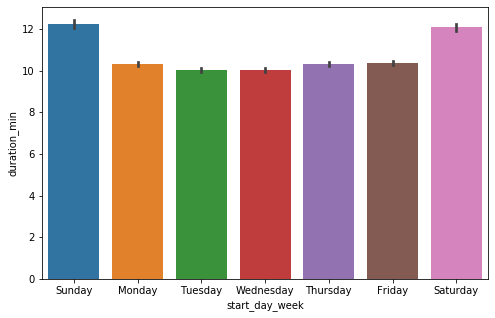

In [29]:
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=[8, 5]);
sb.barplot(x='start_day_week', y='duration_min', data=df_clean,order = days );

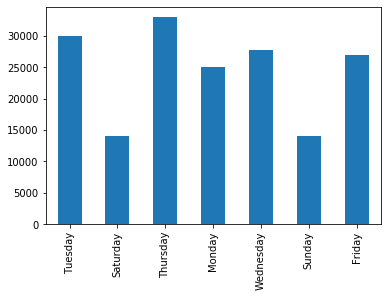

In [30]:
df_clean.start_day_week.value_counts(sort=False).plot.bar();

> Trips duration increase on weekends

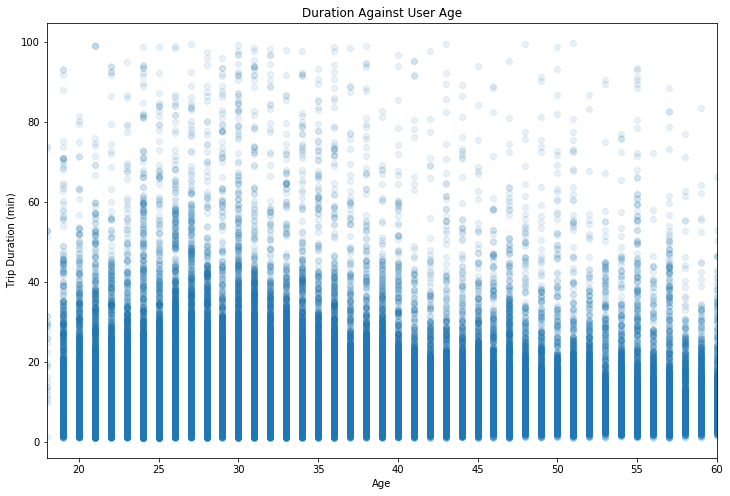

In [31]:
# scatter plot of duration vs. age
plt.figure(figsize = [12, 8])
plt.scatter(data = df_clean, x = 'Age', y = 'duration_min', alpha = 1/10)
plt.xlabel('Age')
plt.xlim(18, 60)
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age')
plt.show()

> Users with age of 31 and 36 seem to have the highest trip duration and as the users get older, the trip duration decrease.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip duration increase between 10 and 16  
Trips duration increase on weekends
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> at 17 and 08 there are rush hours when people going and leaving Work  
Users with age of 31 and 36 seem to have the highest trip duration

## Multivariate Exploration

>I want to investigate on the relationship between the trip duration and the age and gender of the users.

In [32]:
# generate a new field for member age group
df_clean['Age_group'] = df_clean['Age'].apply(lambda x: '10-20' if 10<x<=20
                                                  else '20-30' if 20<x<=30
                                                  else '30-40' if 30<x<=40
                                                  else '40-50' if 40<x<=50
                                                  else '50-60' if 50<x<=60
                                                  else x)

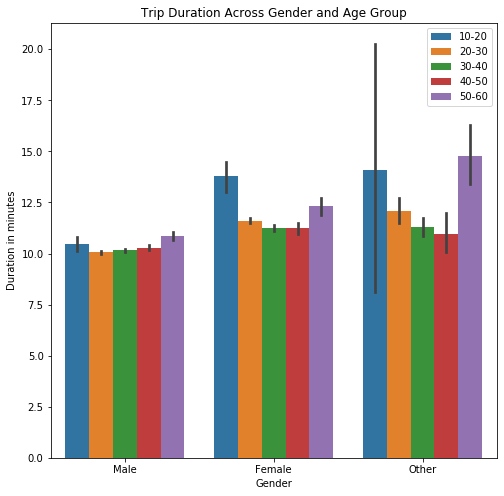

In [33]:
# create bar plot on gender versus duration on levels of the age group variable
plt.figure(figsize = [8, 8])

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='Age_group', data=df_clean.sort_values(by= 'Age_group'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration in minutes')
leg = ax.legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In all gender types, the age range of 10-20 and 50-60 has the longest trip duration, this could be teenagers use bikes for goning to school and university.

### Were there any interesting or surprising interactions between features?

> The Most interesting and it was really unexpected is the age group 50-60 have highest Trips duration this because some old people care alot about their health

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [34]:
# save all changes made to a new csv file
df_clean.to_csv('goBike_clean.csv', 
                 index=False, encoding = 'utf-8')